# Import modules Generate Data

In [1]:
import sys
import scipy
import numpy
import random
import pandas
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs

seed=7

def get_dataset_using_sklearn_make_blobs(n_samples=20, centers=2, std=1):
    X, y = make_blobs(n_samples = n_samples, n_features = 2, centers = centers , cluster_std = std, random_state=seed)
    return X,y

data, y = get_dataset_using_sklearn_make_blobs(550, centers= 2, std=2)
#print(data)
print("dataset samples, features =", data.shape)
#print(data)



dataset samples, features = (550, 2)


# Data Visualization



data plot: 



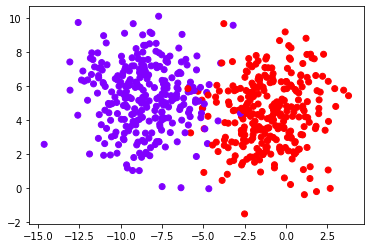

In [2]:
print("\ndata plot: \n")
plt.scatter(x=data[:,0], y=data[:,1], c=y, cmap='rainbow')
plt.show()


# Split data for training and test

In [3]:
X=data[:,0:2]
test_size = 0.09

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
print("X_train shape:",  X_train.shape)
print("X_test shape:",  X_test.shape)
print("y_train shape:",  y_train.shape)
print("y_test shape:",  y_test.shape)

X_train shape: (500, 2)
X_test shape: (50, 2)
y_train shape: (500,)
y_test shape: (50,)


# Best parameters for Linear SVM and KNN algo

In [4]:
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
#print(kfold)


for k in range(2,21,1):
    cv_results_knn = model_selection.cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=kfold)
    print("KNN: k=", k, "accuracy mean = ", cv_results_knn.mean())


for C in [10, 1, 0.1, 0.01]:    
    cv_results_svc = model_selection.cross_val_score(LinearSVC(C=C), X_train, y_train, cv=kfold)
    print("SVC: C= ",C, "accuracy mean = ", cv_results_svc.mean())

KNN: k= 2 accuracy mean =  0.9559999999999998
KNN: k= 3 accuracy mean =  0.966
KNN: k= 4 accuracy mean =  0.966
KNN: k= 5 accuracy mean =  0.9640000000000001
KNN: k= 6 accuracy mean =  0.9639999999999999
KNN: k= 7 accuracy mean =  0.966
KNN: k= 8 accuracy mean =  0.9640000000000001
KNN: k= 9 accuracy mean =  0.97
KNN: k= 10 accuracy mean =  0.9700000000000001
KNN: k= 11 accuracy mean =  0.966
KNN: k= 12 accuracy mean =  0.9640000000000001
KNN: k= 13 accuracy mean =  0.966
KNN: k= 14 accuracy mean =  0.968
KNN: k= 15 accuracy mean =  0.9720000000000001
KNN: k= 16 accuracy mean =  0.968
KNN: k= 17 accuracy mean =  0.966
KNN: k= 18 accuracy mean =  0.968
KNN: k= 19 accuracy mean =  0.9700000000000001
KNN: k= 20 accuracy mean =  0.968
SVC: C=  10 accuracy mean =  0.966


C:\Users\edevbak\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\edevbak\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\edevbak\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\edevbak\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\edevbak\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of 

SVC: C=  1 accuracy mean =  0.97
SVC: C=  0.1 accuracy mean =  0.9739999999999999
SVC: C=  0.01 accuracy mean =  0.95


# Apply LinearSVM and KNN algo for test data

In [5]:
# Make predictions on validation dataset
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print("features ",  knn.n_features_in_)
print("n_samples_fit_ ",  knn.n_samples_fit_)
print("classes_ ",  knn.classes_)

knn_predictions = knn.predict(X_test)
print("\n KNN Y_test: " + str(y_test))
print("\n KNN knn_predictions: " + str(knn_predictions))
print("\nThe KNN accuracy score is: " + str(accuracy_score(y_test, knn_predictions)))

# Make predictions on validation dataset
lin_svc = LinearSVC(C=0.1)
lin_svc.fit(X_train, y_train)
print("\n LinearSVC y_train lin_svc.coef_: " + str(lin_svc.coef_))
print("\n LinearSVC y_train lin_svc.intercept_: " + str(lin_svc.intercept_))
print("\n LinearSVC y_train lin_svc.classes_: " + str(lin_svc.classes_))
print("\n LinearSVC y_train lin_svc.n_features_in_: " + str(lin_svc.n_features_in_))
print("\n LinearSVC y_train lin_svc.n_iter_: " + str(lin_svc.n_iter_))

lin_svc_predictions = lin_svc.predict(X_test)
print("\n LinearSVC Y_test: " + str(y_test))
print("\n LinearSVC lin_svc_predictions: " + str(lin_svc_predictions))
print("\nThe LinearSVC accuracy score is: " + str(accuracy_score(y_test, lin_svc_predictions)))

features  2
n_samples_fit_  500
classes_  [0 1]

 KNN Y_test: [1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 0 0 1 0 0 1]

 KNN knn_predictions: [1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 0 0 1 0 0 1]

The KNN accuracy score is: 0.96

 LinearSVC y_train lin_svc.coef_: [[0.38014665 0.00371334]]

 LinearSVC y_train lin_svc.intercept_: [1.71221477]

 LinearSVC y_train lin_svc.classes_: [0 1]

 LinearSVC y_train lin_svc.n_features_in_: 2

 LinearSVC y_train lin_svc.n_iter_: 209

 LinearSVC Y_test: [1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 0 0 1 0 0 1]

 LinearSVC lin_svc_predictions: [1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 0 0 1 0 0 1]

The LinearSVC accuracy score is: 1.0


# Classification display


 Actual plot: 



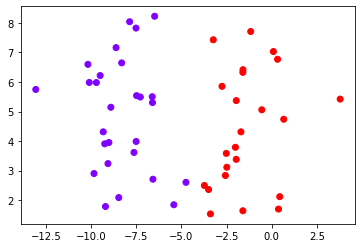


 KNN K=9 plot: 



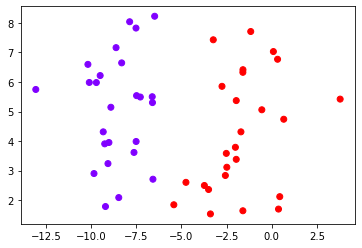


 LinearSVC plot: 



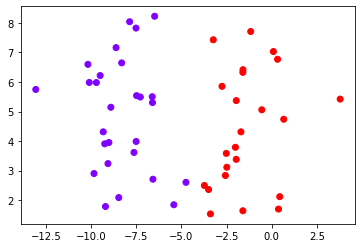

In [6]:
print("\n Actual plot: \n")
plt.scatter(x=X_test[:,0], y=X_test[:,1], c=y_test, cmap='rainbow')
plt.show()

print("\n KNN K=9 plot: \n")
plt.scatter(x=X_test[:,0], y=X_test[:,1], c=knn_predictions, cmap='rainbow')
plt.show()

print("\n LinearSVC plot: \n")
plt.scatter(x=X_test[:,0], y=X_test[:,1], c=lin_svc_predictions, cmap='rainbow')
plt.show()

# Flipping labels of 10% training data (50 samples) 


 data plot: 



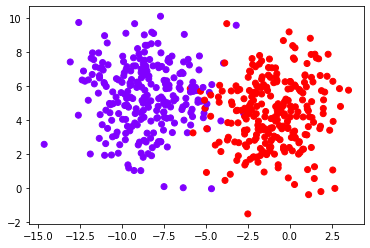

In [7]:
for i in range(0, 50):
    if y_test[i] == 0:
        y_test[i] == 1
    else:
        y_test[i] == 0
        
print("\n data plot: \n")
plt.scatter(x=X_train[:,0], y=X_train[:,1], c=y_train, cmap='rainbow')
plt.show()

# Train on noise data and evalate

In [8]:
# Make predictions on validation dataset
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print("features ",  knn.n_features_in_)
print("n_samples_fit_ ",  knn.n_samples_fit_)
print("classes_ ",  knn.classes_)

knn_predictions = knn.predict(X_test)
print("\n KNN Y_test: " + str(y_test))
print("\n KNN knn_predictions: " + str(knn_predictions))
print("\nThe KNN accuracy score is: " + str(accuracy_score(y_test, knn_predictions)))

# Make predictions on validation dataset
lin_svc = LinearSVC()
lin_svc.fit(X_train, y_train)
print("\n LinearSVC y_train lin_svc.coef_: " + str(lin_svc.coef_))
print("\n LinearSVC y_train lin_svc.intercept_: " + str(lin_svc.intercept_))
print("\n LinearSVC y_train lin_svc.classes_: " + str(lin_svc.classes_))
print("\n LinearSVC y_train lin_svc.n_features_in_: " + str(lin_svc.n_features_in_))
print("\n LinearSVC y_train lin_svc.n_iter_: " + str(lin_svc.n_iter_))

lin_svc_predictions = lin_svc.predict(X_test)
print("\n LinearSVC Y_test: " + str(y_test))
print("\n LinearSVC lin_svc_predictions: " + str(lin_svc_predictions))
print("\nThe LinearSVC accuracy score is: " + str(accuracy_score(y_test, lin_svc_predictions)))

features  2
n_samples_fit_  500
classes_  [0 1]

 KNN Y_test: [1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 0 0 1 0 0 1]

 KNN knn_predictions: [1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 0 0 1 0 0 1]

The KNN accuracy score is: 0.96

 LinearSVC y_train lin_svc.coef_: [[ 0.51830705 -0.06909239]]

 LinearSVC y_train lin_svc.intercept_: [2.73161708]

 LinearSVC y_train lin_svc.classes_: [0 1]

 LinearSVC y_train lin_svc.n_features_in_: 2

 LinearSVC y_train lin_svc.n_iter_: 1000

 LinearSVC Y_test: [1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 0 0 1 0 0 1]

 LinearSVC lin_svc_predictions: [1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 0 0 1 0 0 1]

The LinearSVC accuracy score is: 0.98


C:\Users\edevbak\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# Classification display


 Actual plot: 



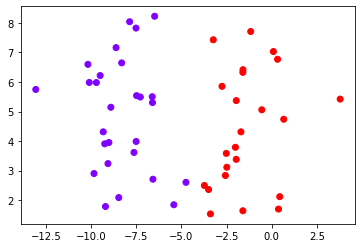


 KNN K=6 plot: 



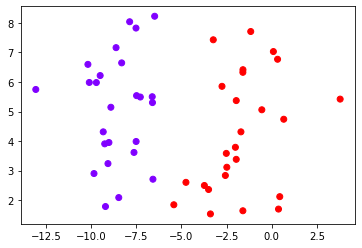


 LinearSVC plot: 



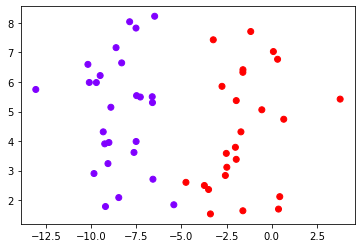

In [9]:
print("\n Actual plot: \n")
plt.scatter(x=X_test[:,0], y=X_test[:,1], c=y_test, cmap='rainbow')
plt.show()

print("\n KNN K=6 plot: \n")
plt.scatter(x=X_test[:,0], y=X_test[:,1], c=knn_predictions, cmap='rainbow')
plt.show()

print("\n LinearSVC plot: \n")
plt.scatter(x=X_test[:,0], y=X_test[:,1], c=lin_svc_predictions, cmap='rainbow')
plt.show()